p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ENCODE
H3K4me1_EE v.s. ENCODE
H3K4me1_Ctrl-: Custom statistical test, P_val:0.000e+00
ENCODE
H3K4me2_EE v.s. ENCODE
H3K4me2_Ctrl-: Custom statistical test, P_val:0.000e+00
GTEx
H3K27ac_EE v.s. GTEx
H3K27ac_Ctrl-: Custom statistical test, P_val:3.705e-219
ENCODE
H3K27ac_EE v.s. ENCODE
H3K27ac_Ctrl-: Custom statistical test, P_val:0.000e+00
ENCODE
H3K4me1_EE v.s. ENCODE
H3K4me1_Ctrl+: Custom statistical test, P_val:1.000e+00
ENCODE
H3K4me2_EE v.s. ENCODE
H3K4me2_Ctrl+: Custom statistical test, P_val:1.000e+00
ENCODE
H3K27ac_EE v.s. ENCODE
H3K27ac_Ctrl+: Custom statistical test, P_val:1.000e+00
GTEx
H3K27ac_EE v.s. GTEx
H3K27ac_Ctrl+: Custom statistical test, P_val:1.000e+00


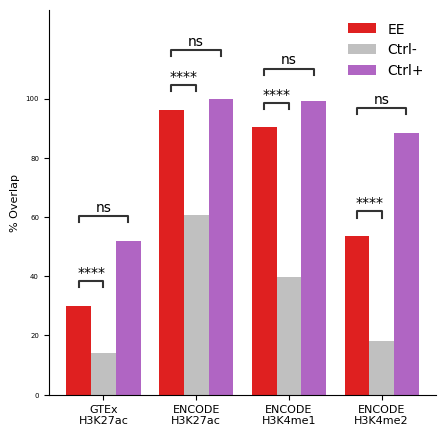

In [10]:
### OVERLAP BRUT WITH PERCENTAGES with colors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.patches import Patch
matplotlib.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(5, 5))

# Data is retrieved from overlap file e.g. awk '{print $4}' pos_ovlp_h3k4me2_encode.tsv |sort -u |wc -l
dataf = [

{"Dataset":"GTEx\nH3K27ac","Exons":"EE","Count":(4037*100/13481)},  
 #13253
{"Dataset":"GTEx\nH3K27ac","Exons":"Ctrl-","Count":1865*100/13253}, 
#404325
{"Dataset":"GTEx\nH3K27ac","Exons":"Ctrl+","Count":209952*100/404325},

{"Dataset":"ENCODE\nH3K27ac","Exons":"EE","Count":(12977*100/13481)},  
 #13253
{"Dataset":"ENCODE\nH3K27ac","Exons":"Ctrl-","Count":8056*100/13253},
#404325
{"Dataset":"ENCODE\nH3K27ac","Exons":"Ctrl+","Count":403522*100/404325},

{"Dataset":"ENCODE\nH3K4me1","Exons":"EE","Count":(12163*100/13481)},  
 #13253
{"Dataset":"ENCODE\nH3K4me1","Exons":"Ctrl-","Count":5272*100/13253}, 
#404325
{"Dataset":"ENCODE\nH3K4me1","Exons":"Ctrl+","Count":400831*100/404325},

{"Dataset":"ENCODE\nH3K4me2","Exons":"EE","Count":(7213*100/13481)},  
 #13253
{"Dataset":"ENCODE\nH3K4me2","Exons":"Ctrl-","Count":2390*100/13253}, 
#404325
{"Dataset":"ENCODE\nH3K4me2","Exons":"Ctrl+","Count":357708*100/404325},

]

df = pd.DataFrame(dataf)

clrs = ['red' if (y == (4037*100/13481)) else 'silver' if (y == (1865*100/13253)) else "mediumorchid" for y in df["Count"]]

ax = sns.barplot(data=df, x="Dataset", y="Count", hue="Exons",palette=clrs)

from statannot import add_stat_annotation
box_pairs = [
    (("GTEx\nH3K27ac", "EE"), ("GTEx\nH3K27ac", "Ctrl-")),
    (("GTEx\nH3K27ac", "EE"), ("GTEx\nH3K27ac", "Ctrl+")),
    (("ENCODE\nH3K27ac", "EE"), ("ENCODE\nH3K27ac", "Ctrl-")),
    (("ENCODE\nH3K27ac", "EE"), ("ENCODE\nH3K27ac", "Ctrl+")),
    (("ENCODE\nH3K4me1", "EE"), ("ENCODE\nH3K4me1", "Ctrl-")),
    (("ENCODE\nH3K4me1", "EE"), ("ENCODE\nH3K4me1", "Ctrl+")),
    (("ENCODE\nH3K4me2", "EE"), ("ENCODE\nH3K4me2", "Ctrl-")),
    (("ENCODE\nH3K4me2", "EE"), ("ENCODE\nH3K4me2", "Ctrl+")),
]

custom_pvalues = [3.705476966876059e-219,1,0,1,0,1,0,1] #fisher test

add_stat_annotation(ax, data=df, x="Dataset", y="Count", hue="Exons", order=["GTEx\nH3K27ac","ENCODE\nH3K27ac","ENCODE\nH3K4me1","ENCODE\nH3K4me2"],
                    box_pairs=box_pairs,
                    pvalues=custom_pvalues, perform_stat_test=False, test=None, text_format='star', loc='inside', verbose=1)

plt.legend(frameon=False)
plt.yticks(fontsize=5)
plt.xticks(fontsize=8)

plt.ylim(0,130)
ticks = ax.get_yticks()
labels = ax.get_yticklabels()
ax.set_yticks(ticks[:-2])
ax.set_yticklabels(labels[:-2])

plt.xlabel("", fontsize=8)
plt.ylabel("% Overlap", fontsize=8)

sns.despine(top=True, right=True, left=False, bottom=False)

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/histone_overlap_hsap.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig2/histone_overlap_hsap.png", format="png", bbox_inches="tight", dpi=450)

plt.show()

In [4]:
### STATS

from scipy.stats import fisher_exact
import numpy as np

#gtex k27ac
hsap_neg = np.array([[4037, 1865],
                  [13481-4037, 13253-1865]])

hsap_pos = np.array([[4037, 209952],
                  [13481-4037, 404325-209952]])

print(fisher_exact(hsap_neg,alternative="greater")) 
print(fisher_exact(hsap_pos,alternative="greater")) 

#encode k27ac
hsap_neg = np.array([[12977, 8056],
                  [13481-12977, 13253-8056]])

hsap_pos = np.array([[12977, 403522],
                  [13481-12977, 404325-403522]])

print(fisher_exact(hsap_neg,alternative="greater")) 
print(fisher_exact(hsap_pos,alternative="greater")) 

#encode k4me1
hsap_neg = np.array([[12163, 5272],
                  [13481-12163, 13253-5272]])

hsap_pos = np.array([[12163, 400831],
                  [13481-12163, 404325-400831]])

print(fisher_exact(hsap_neg,alternative="greater")) 
print(fisher_exact(hsap_pos,alternative="greater")) 

#encode k4me2
hsap_neg = np.array([[7213, 2390],
                  [13481-7213, 13253-2390]])

hsap_pos = np.array([[7213, 357708],
                  [13481-7213, 404325-357708]])

print(fisher_exact(hsap_neg,alternative="greater")) 
print(fisher_exact(hsap_pos,alternative="greater")) 

SignificanceResult(statistic=2.610185623622471, pvalue=3.705476966876059e-219)
SignificanceResult(statistic=0.39574796711566385, pvalue=1.0)
SignificanceResult(statistic=16.610282831686135, pvalue=0.0)
SignificanceResult(statistic=0.05123799135123177, pvalue=1.0)
SignificanceResult(statistic=13.970347396040813, pvalue=0.0)
SignificanceResult(statistic=0.08044274741530995, pvalue=1.0)
SignificanceResult(statistic=5.230447207440062, pvalue=0.0)
SignificanceResult(statistic=0.14996938576368676, pvalue=1.0)
